In [1]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 21s 0us/step


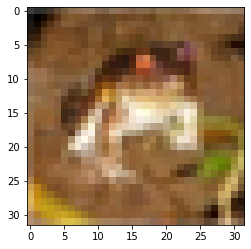

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

In [25]:
print(y_train[0])

[6]


In [8]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [12]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [86]:
import numpy as np

In [98]:
print(set(x_train[0][1][3]))

{27, 8, 51}


In [93]:
x_mean = np.mean(x_train)
x_std = np.std(x_train)

epsilon = 1e-10

x_train_norm =(x_train - x_mean)/ (x_std + epsilon)
x_test_norm =(x_test - x_mean)/ (x_std + epsilon)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [101]:
cnn.compile(
    optimizer='adam',
    loss ='categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_22 (Dense)            (None, 64)               

In [102]:
cnn.fit(x_train_norm,y_train_encoded,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3080 - accuracy: 0.5346
Epoch 2/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9556 - accuracy: 0.6675
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8253 - accuracy: 0.7144
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7391 - accuracy: 0.7442
Epoch 5/20
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6604 - accuracy: 0.7714
Epoch 6/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5938 - accuracy: 0.7904
Epoch 7/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.5361 - accuracy: 0.8097
Epoch 8/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4792 - accuracy: 0.8330
Epoch 9/20
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4272 - accuracy: 0.8501
Epoch 10/20
1563/1563 [==============================] - 23s 15m

In [103]:
loss , accuracy = cnn.evaluate(x_test_norm,y_test_encoded)
print('Test_set_accuracy:',accuracy*100,'%')

313/313 [==============================] - 1s 3ms/step - loss: 1.9209 - accuracy: 0.6945
Test_set_accuracy: 69.45000290870667 %


In [146]:
preds = cnn.predict(x_test_norm)
a=70
pred=np.argmax(preds[a])
gt=int(y_test[a])
s=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 1s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

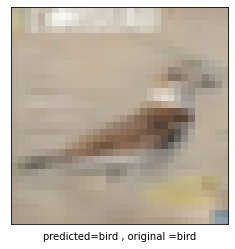

In [147]:
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel('predicted={} , original ={}'.format(s[pred],s[gt]))
plt.imshow(x_test[a])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

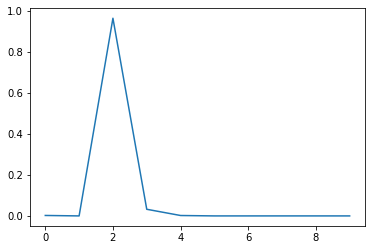

In [148]:
plt.plot(preds[a])
plt.show